In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import seaborn as sns
#import GMM
from statsmodels.sandbox.regression.gmm import GMM, NonlinearIVGMM, LinearIVGMM
import statsmodels.api as sm
#set seaborn graphics
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_gdp = pd.read_pickle('gdpdata.pkl')
df_gdp.index = df_gdp['SurveyDate']
df_gdp = df_gdp.drop('SurveyDate', axis=1)

In [5]:
def bf_melt(df, col, dummy, listd):
    df[dummy] = 0
    dforig = df.copy()
    df['SD'] = df.index
    df = df.drop_duplicates(subset=['SD'], keep='first')
    df1 = df.copy()
    df1[listd] = 0
    df1['CurrentYearDiff'] = df1[col]
    df1[dummy] = 1
    df1 = df1.drop('SD', axis=1)
    dfnew = pd.concat([dforig, df1], axis=0)
    return dfnew.sort_index()

# load shocks

In [6]:
#EOP DEFINITION
mpdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Monetary Event Window')
mpdf.index = mpdf['date']
prdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Release Window')
prdf.index = prdf['date']
pcdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Conference Window')
pcdf.index = pcdf['date']
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdf = mpdf.loc[(mpdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfwork = mpdf.loc[(mpdf.index>dates_list[i])&(mpdf.index<dates_list[i+1])].tail(1)
    #print(newdfwork)
    newdf = newdf.append(newdfwork)
newdf.index = dates_list
#repeat same for press conference
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpr = prdf.loc[(prdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    #newdfprwork = prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1)
    newdfpr = newdfpr.append(prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1))
newdfpr.index = dates_list

#repeat same for press release
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpc = pcdf.loc[(pcdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfpc = newdfpc.append(pcdf.loc[(pcdf.index>dates_list[i])&(pcdf.index<dates_list[i+1])].tail(1))
newdfpc.index = dates_list

#SUM DEFINITION
mpdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Monetary Event Window')
mpdf.index = mpdf['date']
prdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Release Window')
prdf.index = prdf['date']
pcdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Conference Window')
pcdf.index = pcdf['date']
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfsum = mpdf.loc[(mpdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfworksum = mpdf.loc[(mpdf.index>dates_list[i])&(mpdf.index<dates_list[i+1])].sum()
    #print(newdfwork)
    newdfsum = newdfsum.append(newdfwork, ignore_index = True)
newdfsum.index = dates_list
#repeat same for press conference
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfprsum = prdf.loc[(prdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    #newdfprwork = prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1)
    newdfprsum = newdfprsum.append(prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].sum(), ignore_index = True)
newdfprsum.index = dates_list

#repeat same for press release
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpcsum = pcdf.loc[(pcdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfpcsum = newdfpcsum.append(pcdf.loc[(pcdf.index>dates_list[i])&(pcdf.index<dates_list[i+1])].sum(),ignore_index = True)
newdfpcsum.index = dates_list

# transform data into means

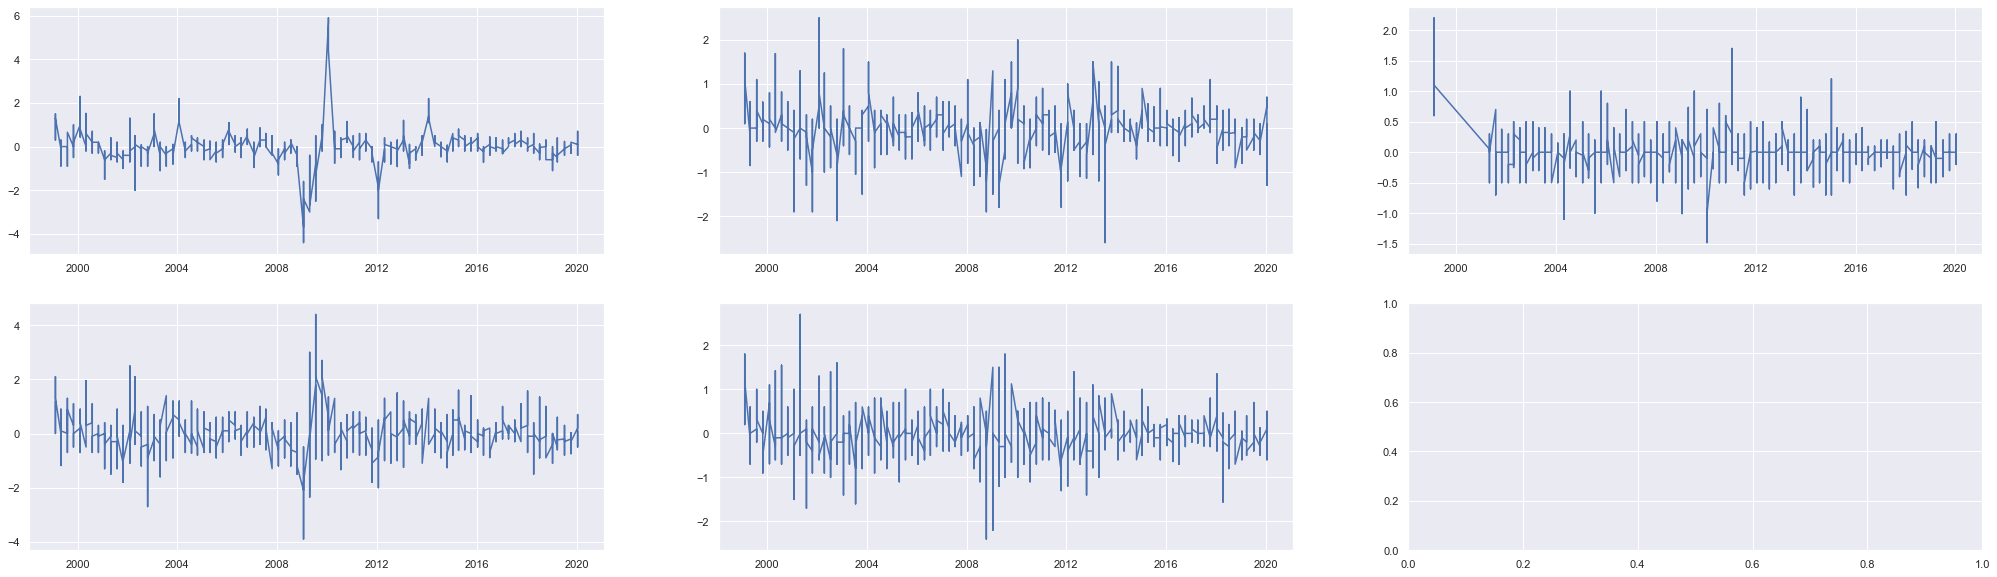

In [30]:
df_gdp['Current Year'] = df_gdp['Current Year'].astype(float)
df_gdp['One Year Ahead'] = df_gdp['One Year Ahead'].astype(float)
df_gdp['Longer Term'] = df_gdp['Longer Term'].astype(float)
df_gdp['Rolling1'] = df_gdp['Rolling1'].astype(float)
df_gdp['Rolling2'] = df_gdp['Rolling2'].astype(float)
dfgdp1 = df_gdp.sort_values(by=['Source', 'SurveyDate'],ascending = [True, True])
dfgdp1['CurrentYearDiff'] = dfgdp1['Current Year'].diff()
dfgdp1['OneYearDiff'] = dfgdp1['One Year Ahead'].diff()
dfgdp1['LongTermDiff'] = dfgdp1['Longer Term'].diff()
dfgdp1['R1'] = dfgdp1['Rolling1'].diff()
dfgdp1['R2'] = dfgdp1['Rolling2'].diff()
dfgdp1 = dfgdp1.sort_index()
#dfgdp1 = dfgdp1.dropna()
#dfgdp1.index = dfgdp1['SurveyDate']
fig, axs = plt.subplots(2, 3, figsize=(35, 10))
axs[0,0].plot(dfgdp1['CurrentYearDiff'].dropna().astype(float))
axs[0,1].plot(dfgdp1['OneYearDiff'].dropna().astype(float))
axs[0,2].plot(dfgdp1['LongTermDiff'].dropna().astype(float))
axs[1,0].plot(dfgdp1['R1'].dropna().astype(float))
axs[1,1].plot(dfgdp1['R2'].dropna().astype(float))

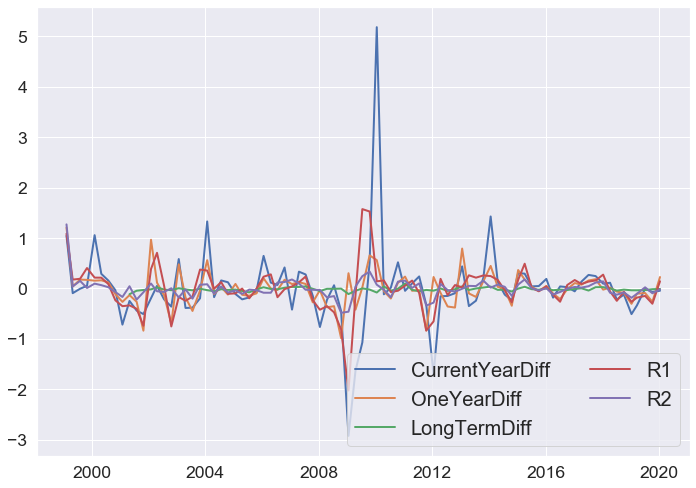

In [21]:
df1gdpmeans = dfgdp1.groupby('SurveyDate')[['CurrentYearDiff','OneYearDiff', 'LongTermDiff', 'R1', 'R2']].mean()
#df1gdpmeans.index = dfgdp1.index.unique()
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.6)
plt.plot(df1gdpmeans, linewidth=2.0)
plt.legend(list(df1gdpmeans), ncol=2, loc='lower right', fontsize=20)

In [8]:
var = 'OIS_2Y'
dfgdp1 = pd.concat([dfgdp1, newdfpc], axis=1)
dfgdp1 = dfgdp1.dropna(subset = [var])
dfgdp1['date'] = dfgdp1.index
dfgdp1['D1'] = (dfgdp1.index.month.isin([1,2])==True)*1*dfgdp1[var]
dfgdp1['D2'] = (dfgdp1.index.month.isin([3,4])==True)*1*dfgdp1[var]
dfgdp1['D3'] = (dfgdp1.index.month.isin([7,8])==True)*1*dfgdp1[var]
dfgdp1['D4'] = (dfgdp1.index.month.isin([10,11])==True)*1*dfgdp1[var]
paneldf = dfgdp1.groupby(['Source', 'date']).mean()

In [9]:
paneldf

Current Year  One Year Ahead  Rolling1  Rolling2  \
Source date                                                           
1      2000-02-09           3.0             3.0       3.0       3.0   
       2000-11-02           3.7             3.2       3.0       2.5   
       2002-02-04           1.3             2.1       1.2       2.3   
       2002-04-22           1.3             2.9       2.5       2.5   
       2002-07-22           NaN             NaN       NaN       NaN   
...                         ...             ...       ...       ...   
128    2019-01-11           1.5             1.5       1.5       1.5   
       2019-03-22           1.2             1.5       1.5       1.5   
       2019-07-05           1.1             1.3       1.3       1.3   
       2019-10-07           1.1             1.2       1.2       1.4   
       2020-01-13           1.2             1.3       1.3       1.3   

                   Longer Term  CurrentYearDiff  OneYearDiff  LongTermDiff  \
Source date                                                                  
1      2000-02-09          2.5              1.1          0.2           NaN   
       2000-11-02          NaN              0.1         -0.1           NaN   
       2002-02-04          2.6             -0.4          0.4           0.0   
       2002-04-22          2.6              0.0          0.8           0.0   
       2002-07-22          NaN              NaN          NaN           NaN   
...                        ...              ...          ...           ...   
128    2019-01-11          1.5              NaN          NaN           NaN   
       2019-03-22          1.5             -0.3          0.0           0.0   
       2019-07-05          1.5             -0.1         -0.2           0.0   
       2019-10-07          1.5              0.0         -0.1           0.0   
       2020-01-13          1.3              0.1          0.1          -0.2   

                    R1   R2  ...     IT10Y   STOXX50      SX7E    EURUSD  \
Source date                  ...                                           
1      2000-02-09  0.2  0.5  ...       NaN  0.293925  0.064770  0.506849   
       2000-11-02 -0.7 -0.1  ...       NaN  0.297553  0.477645 -0.041589   
       2002-02-04  0.0  0.5  ... -1.550000  0.128387 -0.142834 -0.360301   
       2002-04-22  1.3  0.2  ... -2.450000 -0.277004 -0.296042  0.294401   
       2002-07-22  NaN  NaN  ... -0.500000 -0.155177 -0.204364 -0.051101   
...                ...  ...  ...       ...       ...       ...       ...   
128    2019-01-11  NaN  NaN  ...  6.800008 -0.061820 -0.300170 -0.299360   
       2019-03-22  0.0  0.0  ... -0.950000 -0.901300 -3.508020 -0.266620   
       2019-07-05 -0.2 -0.2  ...  2.099991 -0.268920 -1.615870 -0.097700   
       2019-10-07 -0.1  0.1  ...  3.499997 -0.453850  0.735889  0.518347   
       2020-01-13  0.1 -0.1  ...  3.250003  0.509546  1.683207 -0.008980   

                     EURGBP    EURJPY        D1    D2        D3        D4  
Source date                                                                
1      2000-02-09  0.614378  0.273650  4.000000  0.00  0.000000  0.000000  
       2000-11-02 -0.137339  0.301875  0.000000  0.00  0.000000  0.000000  
       2002-02-04 -0.288277 -0.374919 -0.500000  0.00  0.000000  0.000000  
       2002-04-22  0.130240 -0.085727  0.000000 -3.00  0.000000  0.000000  
       2002-07-22  0.054545 -0.012775  0.000000  0.00 -1.200000  0.000000  
...                     ...       ...       ...   ...       ...       ...  
128    2019-01-11 -0.078010 -0.217190 -0.680000  0.00  0.000000  0.000000  
       2019-03-22 -0.040790 -0.425720  0.000000 -0.48  0.000000  0.000000  
       2019-07-05  0.079020  0.032832  0.000000  0.00  0.489998  0.000000  
       2019-10-07  0.420325  0.565449  0.000000  0.00  0.000000  5.849999  
       2020-01-13  0.041382  0.210587  0.409999  0.00  0.000000  0.000000  

[9472 rows x 59 columns]

In [12]:
dfgdp1

,Source,Current Year,One Year Ahead,Two Years Ahead,Rolling1,Rolling2,Longer Term,CurrentYearDiff,OneYearDiff,LongTermDiff,...,IT10Y,STOXX50,SX7E,EURUSD,EURGBP,EURJPY,D1,D2,D3,D4
SurveyDate,,,,,,,,,,,,,,,,,,,,,
2000-02-09,93,3.0,3.00,NaN,NaN,NaN,NaN,1.0,0.1,NaN,...,NaN,0.293925,0.064770,0.506849,0.614378,0.273650,4.000000,0.0,0.0,0.0
2000-02-09,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.293925,0.064770,0.506849,0.614378,0.273650,4.000000,0.0,0.0,0.0
2000-02-09,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.293925,0.064770,0.506849,0.614378,0.273650,4.000000,0.0,0.0,0.0
2000-02-09,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.293925,0.064770,0.506849,0.614378,0.273650,4.000000,0.0,0.0,0.0
2000-02-09,94,3.2,2.70,NaN,3.10,2.6,2.6,1.3,-0.2,NaN,...,NaN,0.293925,0.064770,0.506849,0.614378,0.273650,4.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-13,90,1.3,1.50,1.7,1.20,1.4,1.6,NaN,NaN,NaN,...,3.250003,0.509546,1.683207,-0.008980,0.041382,0.210587,0.409999,0.0,0.0,0.0
2020-01-13,91,1.2,1.15,1.1,1.35,1.1,1.3,NaN,NaN,NaN,...,3.250003,0.509546,1.683207,-0.008980,0.041382,0.210587,0.409999,0.0,0.0,0.0
2020-01-13,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.250003,0.509546,1.683207,-0.008980,0.041382,0.210587,0.409999,0.0,0.0,0.0


In [44]:
df1gdpmeans = dfgdp1.loc[dfgdp1['Source']==1]

In [53]:
'''
'''
class mpGMM(GMM):
    
    def __init__(self, *args, **kwds):
        # set appropriate counts for moment conditions and parameters
        # TODO: clean up signature
        kwds.setdefault('k_moms', 10)
        kwds.setdefault('k_params', 8)
        super(mpGMM, self).__init__(*args, **kwds)


    def momcond(self, params):
        c0, c1, c2, c3, c4, c5, c6, c7 = params
        endog = self.endog
        exog = self.exog
        #defining variables
        #interaction dummies
        dQ1 = exog[:,0]
        dQ2 = exog[:,1]
        dQ3 = exog[:,2]
        dQ4 = exog[:,3]
        #dTY = exog[:,4]
        #endogenous variables
        currentY = endog[:,0]
        nextY = endog[:,1]
        #twoY = endog[:,2]
        rolling1 = endog[:,2]
        rolling2 = endog[:,3]
        #monetary policy shock
        mp = exog[:,4]
        #next year forecasts
        error11 = dQ1*(nextY-mp*(1/4*c1+1/2*c2+3/4*c3+1*c4+3/4*c5+1/2*c6+1/4*c7))
        error1 = dQ2*(nextY-mp*(1/4*c0+1/2*c1+3/4*c2+1*c3+3/4*c4+1/2*c5+1/4*c6))
        error2 = dQ3*(nextY-mp*(1/2*c0+3/4*c1+1*c2+3/4*c3+1/2*c4+1/4*c5))
        error3 = dQ4*(nextY-mp*(3/4*c0+1*c1+3/4*c2+1/2*c3+1/4*c4))
        #current year forecasts
        error12 = dQ1*(currentY-mp*(c0+3/4*c1+1/2*c2+1/4*c3))
        error4 = dQ2*(currentY-mp*(3/4*c0+1/2*c1+1/4*c2))
        error5 = dQ3*(currentY-mp*(1/2*c0+1/4*c1))
        error6 = dQ4*(currentY-mp*(1/4*c0))
        #rolling forecasts
        #r
        error13 = mp*(rolling1-mp*(c3))
        error14 = mp*(rolling2-mp*(c7))
        g = np.column_stack((error1, error2, error3, error4, error5, error6, 
                            error11, error12, error13, error14))
        return g



In [79]:
#gmmresults = np.zeros((150, 8))
#order data
for i in range(30, 129):
    df1gdpmeans = dfgdp1.loc[dfgdp1['Source']==i]
    dataols = pd.concat([df1gdpmeans, newdfpc], axis=1)
    dataols = dataols.dropna(subset = ['Source','CurrentYearDiff', 'OneYearDiff', 'R1', 'R2'])
    var = 'OIS_2Y'
    dataols = dataols.dropna(subset = [var]).iloc[:-1,:]
    #time periods
    #dataols = dataols.loc[(dataols.index>'2002-01-01')&(dataols.index<'2014-01-01')]
    dataols = dataols.loc[dataols.index>'2002-01-01']
    #create dummies
    dataols['D1'] = (dataols.index.month.isin([1,2])==True)*1*dataols[var]
    dataols['D2'] = (dataols.index.month.isin([3,4])==True)*1*dataols[var]
    dataols['D3'] = (dataols.index.month.isin([7,8])==True)*1*dataols[var]
    dataols['D4'] = (dataols.index.month.isin([10,11])==True)*1*dataols[var]
    #dataols['DTY'] = (dataols['TwoYearDiff'].isnull()==False)*1
    #dataols['TwoYearDiff'] = dataols['TwoYearDiff'].fillna(value=0)
    exog = dataols[['D1', 'D2', 'D3', 'D4', var]]
    #exog = dataols[[var]]
    endog = dataols[['CurrentYearDiff', 'OneYearDiff', 'R1', 'R2']].copy()
    #instr = np.asarray(exogt.iloc[:, 4:])
    try:
        model = mpGMM(endog, exog,  None)
    except:
        continue
    beta0 = np.zeros((1, 8))
    try:
        res = model.fititer(beta0, maxiter=1000, optim_method='bfgs',  weights_method='cov',
                        wargs={'centered':False})
    except:
        continue
    w0 = res[1]
    try:
        inv_weights = np.linalg.inv(w0)
    except:
        continue
    try:
        res = model.fit(beta0, maxiter=2,  inv_weights =inv_weights, optim_method='bfgs', weights_method='cov',
                    wargs={'centered':False})
    except:
        continue
    #print(res.summary(yname='GDP forecast diff', xname=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']))
    gmmresults[i,:] = res.params
    print('DONE WITH SOURCE'+str(i))

Optimization terminated successfully.
         Current function value: 0.000052
         Iterations: 31
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.196296
         Iterations: 6
         Function evaluations: 49
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 57
         Function evaluations: 64
         Gradient evaluations: 64
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 88
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
      

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
    

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 14
    

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 14
   

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 17


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 14
    

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 17
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 18
  

         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 12
         Function evaluations: 18
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 16
   

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 19
 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 19


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 17


Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 15
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 16
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 19
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 1

Optimization terminated successfully.
         Current function value: 0.330527
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.337542
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.342760
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.346345
         Iterations: 11
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.348447
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.349188
         Iterations: 10
         Function evaluations: 17
  

         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.022932
         Iterations: 15
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.022932
         Iterations: 9
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.022933
         Iterations: 11
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.022933
         Iterations: 9
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.022933
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.022933
         Iterations: 12
    

Optimization terminated successfully.
         Current function value: 0.009205
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.009196
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.009196
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.009196
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.009196
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.009196
         Iterations: 0
         Function evaluations: 1
     

         Current function value: 0.128663
         Iterations: 20
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 0.128780
         Iterations: 24
         Function evaluations: 135
         Gradient evaluations: 121
Optimization terminated successfully.
         Current function value: 0.128895
         Iterations: 19
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.129007
         Iterations: 19
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 0.129117
         Iterations: 20
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.129224
         Iterations: 26
         Function evaluations: 122
         Gradient evaluations: 110
         Current function value: 0.129329
         Iterations: 19
         Function evaluations: 76
         Gradie

         Current function value: 0.132150
         Iterations: 24
         Function evaluations: 119
         Gradient evaluations: 107
         Current function value: 0.132208
         Iterations: 20
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 0.132264
         Iterations: 22
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 0.132320
         Iterations: 15
         Function evaluations: 158
         Gradient evaluations: 144
         Current function value: 0.132375
         Iterations: 20
         Function evaluations: 118
         Gradient evaluations: 106
         Current function value: 0.132430
         Iterations: 15
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 0.132483
         Iterations: 24
         Function evaluations: 169
         Gradient evaluations: 158
Optimization terminated successfully.
         Curre

         Current function value: 0.133965
         Iterations: 22
         Function evaluations: 133
         Gradient evaluations: 121
         Current function value: 0.133996
         Iterations: 12
         Function evaluations: 37
         Gradient evaluations: 28
         Current function value: 0.134028
         Iterations: 20
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 0.134059
         Iterations: 22
         Function evaluations: 386
         Gradient evaluations: 370
         Current function value: 0.134088
         Iterations: 16
         Function evaluations: 111
         Gradient evaluations: 99
         Current function value: 0.134117
         Iterations: 19
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 0.134146
         Iterations: 26
         Function evaluations: 203
         Gradient evaluations: 187
         Current function value: 0.134174
         Ite

         Current function value: 0.134930
         Iterations: 10
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 0.134948
         Iterations: 16
         Function evaluations: 117
         Gradient evaluations: 105
         Current function value: 0.134971
         Iterations: 17
         Function evaluations: 149
         Gradient evaluations: 137
         Current function value: 0.134988
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 80
         Current function value: 0.135001
         Iterations: 17
         Function evaluations: 125
         Gradient evaluations: 116
         Current function value: 0.135021
         Iterations: 16
         Function evaluations: 224
         Gradient evaluations: 211
         Current function value: 0.135036
         Iterations: 4
         Function evaluations: 121
         Gradient evaluations: 109
         Current function value: 0.135048
         Ite

         Current function value: 0.135528
         Iterations: 12
         Function evaluations: 140
         Gradient evaluations: 127
         Current function value: 0.135537
         Iterations: 8
         Function evaluations: 103
         Gradient evaluations: 89
         Current function value: 0.135545
         Iterations: 8
         Function evaluations: 146
         Gradient evaluations: 123
         Current function value: 0.135556
         Iterations: 15
         Function evaluations: 119
         Gradient evaluations: 108
         Current function value: 0.135564
         Iterations: 13
         Function evaluations: 158
         Gradient evaluations: 138
         Current function value: 0.135571
         Iterations: 7
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 0.135578
         Iterations: 16
         Function evaluations: 131
         Gradient evaluations: 119
         Current function value: 0.135588
         It

         Current function value: 0.135881
         Iterations: 5
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 0.135881
         Iterations: 11
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 0.135877
         Iterations: 7
         Function evaluations: 116
         Gradient evaluations: 104
         Current function value: 0.135887
         Iterations: 15
         Function evaluations: 251
         Gradient evaluations: 232
         Current function value: 0.135898
         Iterations: 3
         Function evaluations: 111
         Gradient evaluations: 99
         Current function value: 0.135901
         Iterations: 9
         Function evaluations: 120
         Gradient evaluations: 103
         Current function value: 0.135911
         Iterations: 8
         Function evaluations: 140
         Gradient evaluations: 122
         Current function value: 0.135910
         Iterati

         Current function value: 0.136090
         Iterations: 19
         Function evaluations: 111
         Gradient evaluations: 100
         Current function value: 0.136093
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 0.136097
         Iterations: 15
         Function evaluations: 174
         Gradient evaluations: 162
         Current function value: 0.136132
         Iterations: 9
         Function evaluations: 229
         Gradient evaluations: 214
         Current function value: 0.136111
         Iterations: 9
         Function evaluations: 163
         Gradient evaluations: 144
         Current function value: 0.136115
         Iterations: 16
         Function evaluations: 123
         Gradient evaluations: 111
         Current function value: 0.136115
         Iterations: 17
         Function evaluations: 72
         Gradient evaluations: 61
         Current function value: 0.136049
         Ite

         Current function value: 0.136188
         Iterations: 6
         Function evaluations: 192
         Gradient evaluations: 178
         Current function value: 0.136180
         Iterations: 2
         Function evaluations: 31
         Gradient evaluations: 20
         Current function value: -5.380418
         Iterations: 29
         Function evaluations: 156
         Gradient evaluations: 144
         Current function value: 0.043573
         Iterations: 49
         Function evaluations: 323
         Gradient evaluations: 299
DONE WITH SOURCE47
Optimization terminated successfully.
         Current function value: 0.000426
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.066081
         Iterations: 11
         Function evaluations: 111
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 0.073206
         Iterations: 12
         Function evaluations

Optimization terminated successfully.
         Current function value: 0.068098
         Iterations: 19
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.071385
         Iterations: 20
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.074074
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.077645
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.082061
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.086921
         Iterations: 14
         Function evaluations: 17
  

         Current function value: -8537.866138
         Iterations: 3
         Function evaluations: 128
         Gradient evaluations: 116
         Current function value: -35.178375
         Iterations: 48
         Function evaluations: 176
         Gradient evaluations: 164
Optimization terminated successfully.
         Current function value: 0.066078
         Iterations: 38
         Function evaluations: 49
         Gradient evaluations: 49
Optimization terminated successfully.
         Current function value: 0.109775
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.112713
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.119564
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
         Current function value: -5

         Current function value: 0.413388
         Iterations: 6
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 0.413462
         Iterations: 8
         Function evaluations: 136
         Gradient evaluations: 119
         Current function value: 0.413972
         Iterations: 6
         Function evaluations: 13
         Gradient evaluations: 12
         Current function value: 0.410363
         Iterations: 8
         Function evaluations: 115
         Gradient evaluations: 103
         Current function value: 0.415685
         Iterations: 6
         Function evaluations: 27
         Gradient evaluations: 16
         Current function value: 0.417347
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 0.412566
         Iterations: 9
         Function evaluations: 171
         Gradient evaluations: 158
         Current function value: 0.411772
         Iterations:

         Current function value: 0.413538
         Iterations: 5
         Function evaluations: 123
         Gradient evaluations: 108
         Current function value: 0.410727
         Iterations: 7
         Function evaluations: 126
         Gradient evaluations: 114
         Current function value: 0.410302
         Iterations: 7
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 0.419655
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 0.414278
         Iterations: 4
         Function evaluations: 69
         Gradient evaluations: 58
         Current function value: 0.412126
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 0.409015
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 0.420234
         Iterations: 5

         Current function value: 0.416547
         Iterations: 9
         Function evaluations: 156
         Gradient evaluations: 143
         Current function value: 0.414765
         Iterations: 8
         Function evaluations: 123
         Gradient evaluations: 109
         Current function value: 0.409434
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 0.412043
         Iterations: 6
         Function evaluations: 83
         Gradient evaluations: 72
         Current function value: 0.412886
         Iterations: 7
         Function evaluations: 123
         Gradient evaluations: 113
         Current function value: 0.410109
         Iterations: 8
         Function evaluations: 183
         Gradient evaluations: 171
         Current function value: 0.410380
         Iterations: 6
         Function evaluations: 60
         Gradient evaluations: 48
         Current function value: 0.411453
         Iteration

         Current function value: 0.414185
         Iterations: 11
         Function evaluations: 218
         Gradient evaluations: 199
         Current function value: 0.413765
         Iterations: 7
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 0.414962
         Iterations: 5
         Function evaluations: 77
         Gradient evaluations: 66
         Current function value: 0.414302
         Iterations: 6
         Function evaluations: 66
         Gradient evaluations: 54
         Current function value: 0.413293
         Iterations: 5
         Function evaluations: 64
         Gradient evaluations: 53
         Current function value: 0.412991
         Iterations: 8
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 0.412578
         Iterations: 6
         Function evaluations: 137
         Gradient evaluations: 125
         Current function value: 0.412554
         Iterations:

         Current function value: 0.415123
         Iterations: 6
         Function evaluations: 118
         Gradient evaluations: 104
         Current function value: 0.411907
         Iterations: 7
         Function evaluations: 200
         Gradient evaluations: 186
         Current function value: 0.412751
         Iterations: 6
         Function evaluations: 195
         Gradient evaluations: 182
         Current function value: 0.410379
         Iterations: 6
         Function evaluations: 57
         Gradient evaluations: 45
         Current function value: 0.415704
         Iterations: 5
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 0.416661
         Iterations: 6
         Function evaluations: 139
         Gradient evaluations: 125
         Current function value: 0.409508
         Iterations: 7
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 0.413456
         Iterations

         Current function value: 0.405501
         Iterations: 6
         Function evaluations: 140
         Gradient evaluations: 128
         Current function value: 0.417552
         Iterations: 6
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 0.409875
         Iterations: 7
         Function evaluations: 149
         Gradient evaluations: 137
         Current function value: 0.414615
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 75
         Current function value: 0.411483
         Iterations: 7
         Function evaluations: 118
         Gradient evaluations: 106
         Current function value: 0.410590
         Iterations: 10
         Function evaluations: 158
         Gradient evaluations: 146
         Current function value: 0.412549
         Iterations: 8
         Function evaluations: 275
         Gradient evaluations: 258
         Current function value: 0.410553
         Iterati

         Current function value: 0.409043
         Iterations: 6
         Function evaluations: 59
         Gradient evaluations: 47
         Current function value: 0.413787
         Iterations: 6
         Function evaluations: 27
         Gradient evaluations: 26
         Current function value: 0.416922
         Iterations: 7
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 0.413241
         Iterations: 6
         Function evaluations: 179
         Gradient evaluations: 162
         Current function value: 0.409244
         Iterations: 7
         Function evaluations: 60
         Gradient evaluations: 48
         Current function value: 0.412506
         Iterations: 4
         Function evaluations: 90
         Gradient evaluations: 79
         Current function value: 0.411644
         Iterations: 9
         Function evaluations: 150
         Gradient evaluations: 138
         Current function value: 0.415132
         Iterations: 6


         Current function value: 0.414628
         Iterations: 7
         Function evaluations: 192
         Gradient evaluations: 179
         Current function value: 0.413744
         Iterations: 7
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 0.409862
         Iterations: 9
         Function evaluations: 194
         Gradient evaluations: 182
         Current function value: 0.413571
         Iterations: 4
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 0.414156
         Iterations: 7
         Function evaluations: 170
         Gradient evaluations: 148
         Current function value: 0.413986
         Iterations: 5
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 0.415809
         Iterations: 6
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 0.413649
         Iteration

         Current function value: 0.415184
         Iterations: 5
         Function evaluations: 84
         Gradient evaluations: 74
         Current function value: 0.411712
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 0.412568
         Iterations: 5
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 0.419883
         Iterations: 5
         Function evaluations: 133
         Gradient evaluations: 123
         Current function value: 0.416890
         Iterations: 6
         Function evaluations: 63
         Gradient evaluations: 51
         Current function value: 0.409875
         Iterations: 6
         Function evaluations: 158
         Gradient evaluations: 144
         Current function value: 0.413048
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 0.413300
         Iterations: 7


         Current function value: 0.414079
         Iterations: 5
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 0.416580
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 80
         Current function value: 0.417523
         Iterations: 5
         Function evaluations: 26
         Gradient evaluations: 16
         Current function value: 0.411313
         Iterations: 12
         Function evaluations: 135
         Gradient evaluations: 123
         Current function value: 0.411572
         Iterations: 7
         Function evaluations: 132
         Gradient evaluations: 120
         Current function value: 0.412371
         Iterations: 6
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 0.412894
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 0.414379
         Iterations:

         Current function value: 0.410782
         Iterations: 8
         Function evaluations: 120
         Gradient evaluations: 108
         Current function value: 0.413928
         Iterations: 5
         Function evaluations: 68
         Gradient evaluations: 57
         Current function value: 0.414524
         Iterations: 7
         Function evaluations: 132
         Gradient evaluations: 120
         Current function value: 0.411119
         Iterations: 9
         Function evaluations: 238
         Gradient evaluations: 213
         Current function value: 0.412848
         Iterations: 6
         Function evaluations: 143
         Gradient evaluations: 128
         Current function value: 0.413668
         Iterations: 5
         Function evaluations: 143
         Gradient evaluations: 130
         Current function value: 0.412486
         Iterations: 6
         Function evaluations: 123
         Gradient evaluations: 111
         Current function value: 0.411333
         Iterat

         Current function value: 0.410613
         Iterations: 12
         Function evaluations: 294
         Gradient evaluations: 266
         Current function value: 0.416813
         Iterations: 4
         Function evaluations: 114
         Gradient evaluations: 103
         Current function value: 0.411822
         Iterations: 7
         Function evaluations: 117
         Gradient evaluations: 101
         Current function value: 0.416687
         Iterations: 4
         Function evaluations: 26
         Gradient evaluations: 15
         Current function value: 0.412846
         Iterations: 8
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 0.417508
         Iterations: 5
         Function evaluations: 135
         Gradient evaluations: 117
         Current function value: 0.411075
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 0.412180
         Iteratio

         Current function value: 0.410476
         Iterations: 9
         Function evaluations: 201
         Gradient evaluations: 189
         Current function value: 0.413923
         Iterations: 7
         Function evaluations: 100
         Gradient evaluations: 89
         Current function value: 0.411014
         Iterations: 6
         Function evaluations: 122
         Gradient evaluations: 110
         Current function value: 0.413213
         Iterations: 7
         Function evaluations: 116
         Gradient evaluations: 104
         Current function value: 0.411165
         Iterations: 6
         Function evaluations: 124
         Gradient evaluations: 111
         Current function value: 0.416116
         Iterations: 7
         Function evaluations: 143
         Gradient evaluations: 133
         Current function value: 0.410371
         Iterations: 6
         Function evaluations: 227
         Gradient evaluations: 202
         Current function value: 0.410434
         Itera

         Current function value: 0.411615
         Iterations: 7
         Function evaluations: 196
         Gradient evaluations: 185
         Current function value: 0.416664
         Iterations: 5
         Function evaluations: 42
         Gradient evaluations: 34
         Current function value: 0.413050
         Iterations: 4
         Function evaluations: 88
         Gradient evaluations: 77
         Current function value: 0.409724
         Iterations: 9
         Function evaluations: 164
         Gradient evaluations: 146
         Current function value: 0.407741
         Iterations: 10
         Function evaluations: 249
         Gradient evaluations: 228
         Current function value: 0.410304
         Iterations: 9
         Function evaluations: 129
         Gradient evaluations: 117
         Current function value: 0.410464
         Iterations: 9
         Function evaluations: 179
         Gradient evaluations: 160
         Current function value: 0.420490
         Iterati

         Current function value: 0.410467
         Iterations: 9
         Function evaluations: 253
         Gradient evaluations: 240
         Current function value: 0.413621
         Iterations: 6
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 0.413972
         Iterations: 7
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 0.410849
         Iterations: 5
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 0.410369
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 0.414127
         Iterations: 5
         Function evaluations: 55
         Gradient evaluations: 43
         Current function value: 0.414174
         Iterations: 5
         Function evaluations: 179
         Gradient evaluations: 166
         Current function value: 0.414371
         Iterations:

         Current function value: 0.410490
         Iterations: 8
         Function evaluations: 65
         Gradient evaluations: 64
         Current function value: 0.415093
         Iterations: 9
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 0.411341
         Iterations: 8
         Function evaluations: 142
         Gradient evaluations: 130
         Current function value: 0.411713
         Iterations: 6
         Function evaluations: 138
         Gradient evaluations: 125
         Current function value: 0.414741
         Iterations: 6
         Function evaluations: 209
         Gradient evaluations: 197
         Current function value: 0.415091
         Iterations: 4
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 0.412961
         Iterations: 6
         Function evaluations: 78
         Gradient evaluations: 67
         Current function value: 0.411787
         Iterations

         Current function value: 0.415093
         Iterations: 6
         Function evaluations: 74
         Gradient evaluations: 63
         Current function value: 0.421922
         Iterations: 4
         Function evaluations: 60
         Gradient evaluations: 51
         Current function value: 0.413389
         Iterations: 5
         Function evaluations: 84
         Gradient evaluations: 73
         Current function value: 0.414303
         Iterations: 5
         Function evaluations: 70
         Gradient evaluations: 58
         Current function value: 0.414894
         Iterations: 7
         Function evaluations: 155
         Gradient evaluations: 141
         Current function value: 0.415912
         Iterations: 4
         Function evaluations: 71
         Gradient evaluations: 60
         Current function value: 0.410821
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 0.414838
         Iterations: 4
 

         Current function value: 0.410160
         Iterations: 8
         Function evaluations: 154
         Gradient evaluations: 135
         Current function value: 0.412787
         Iterations: 8
         Function evaluations: 269
         Gradient evaluations: 248
         Current function value: 0.413746
         Iterations: 5
         Function evaluations: 147
         Gradient evaluations: 134
         Current function value: 0.415968
         Iterations: 5
         Function evaluations: 54
         Gradient evaluations: 44
         Current function value: 0.415886
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 81
         Current function value: 0.420189
         Iterations: 4
         Function evaluations: 76
         Gradient evaluations: 67
         Current function value: 0.417264
         Iterations: 5
         Function evaluations: 27
         Gradient evaluations: 17
         Current function value: 0.411553
         Iterations: 

         Current function value: 0.416219
         Iterations: 5
         Function evaluations: 54
         Gradient evaluations: 44
         Current function value: 0.415104
         Iterations: 8
         Function evaluations: 25
         Gradient evaluations: 24
         Current function value: 0.412562
         Iterations: 7
         Function evaluations: 188
         Gradient evaluations: 170
         Current function value: 0.413285
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 74
         Current function value: 0.410425
         Iterations: 7
         Function evaluations: 115
         Gradient evaluations: 103
         Current function value: 0.412677
         Iterations: 7
         Function evaluations: 88
         Gradient evaluations: 77
         Current function value: 0.414563
         Iterations: 4
         Function evaluations: 111
         Gradient evaluations: 100
         Current function value: 0.415220
         Iterations: 

         Current function value: 0.412029
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 0.416370
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 0.411605
         Iterations: 5
         Function evaluations: 61
         Gradient evaluations: 49
         Current function value: 0.411776
         Iterations: 4
         Function evaluations: 71
         Gradient evaluations: 59
         Current function value: 0.409989
         Iterations: 7
         Function evaluations: 122
         Gradient evaluations: 110
         Current function value: 0.416316
         Iterations: 8
         Function evaluations: 98
         Gradient evaluations: 84
         Current function value: 0.413333
         Iterations: 9
         Function evaluations: 203
         Gradient evaluations: 185
         Current function value: 0.410001
         Iterations: 1

         Current function value: 0.415030
         Iterations: 4
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 0.409289
         Iterations: 11
         Function evaluations: 229
         Gradient evaluations: 208
         Current function value: 0.414259
         Iterations: 5
         Function evaluations: 55
         Gradient evaluations: 43
         Current function value: 0.414019
         Iterations: 11
         Function evaluations: 357
         Gradient evaluations: 330
         Current function value: 0.416217
         Iterations: 4
         Function evaluations: 74
         Gradient evaluations: 65
         Current function value: 0.414347
         Iterations: 4
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 0.411951
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 0.412884
         Iterations: 

Optimization terminated successfully.
         Current function value: 0.004660
         Iterations: 23
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.004646
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.004645
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.004645
         Iterations: 7
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.004645
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.004645
         Iterations: 1
         Function evaluations: 3
     

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 28
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 41
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 34


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
  

         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         C

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
  

         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.139454
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.138995
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.136254
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.132061
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.128193
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0

         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.179611
         Iterations: 21
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.200026
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.217698
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.233264
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.247204
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.259867
         Iterations: 22
  

Optimization terminated successfully.
         Current function value: 0.347400
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.354453
         Iterations: 22
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.361328
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.368074
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.374737
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.381352
         Iterations: 23
         Function evaluations: 29
  

Optimization terminated successfully.
         Current function value: 0.340570
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.343479
         Iterations: 19
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.328769
         Iterations: 17
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.311913
         Iterations: 22
         Function evaluations: 172
         Gradient evaluations: 157
         Current function value: 0.297965
         Iterations: 25
         Function evaluations: 196
         Gradient evaluations: 174
         Current function value: 0.287940
         Iterations: 18
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 0.0031

Optimization terminated successfully.
         Current function value: 0.255525
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.267507
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.278591
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.288926
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.298627
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.307780
         Iterations: 24
         Function evaluations: 29
  

Optimization terminated successfully.
         Current function value: 0.354473
         Iterations: 22
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.361347
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.368093
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.374756
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.381371
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.387934
         Iterations: 19
         Function evaluations: 25
  

Optimization terminated successfully.
         Current function value: 0.328768
         Iterations: 17
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.311912
         Iterations: 20
         Function evaluations: 90
         Gradient evaluations: 80
         Current function value: 0.297962
         Iterations: 23
         Function evaluations: 81
         Gradient evaluations: 65
         Current function value: 0.288508
         Iterations: 30
         Function evaluations: 157
         Gradient evaluations: 145
Optimization terminated successfully.
         Current function value: 0.003166
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.097913
         Iterations: 19
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.143156


Optimization terminated successfully.
         Current function value: 0.227935
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.242425
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.255516
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.267500
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.278584
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.288920
         Iterations: 23
         Function evaluations: 27
  

Optimization terminated successfully.
         Current function value: 0.347420
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.354472
         Iterations: 22
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.361347
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.368092
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.374756
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.381370
         Iterations: 23
         Function evaluations: 29
  

Optimization terminated successfully.
         Current function value: 0.368776
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340571
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.343479
         Iterations: 19
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.328772
         Iterations: 17
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.311915
         Iterations: 27
         Function evaluations: 220
         Gradient evaluations: 208
         Current function value: 0.297967
         Iterations: 19
         Function evaluations: 52
         Gradient evaluations: 41
         Current function value: 0.288046


Optimization terminated successfully.
         Current function value: 0.267505
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.278588
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.288924
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.298625
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.307778
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.316451
         Iterations: 23
         Function evaluations: 29
  

Optimization terminated successfully.
         Current function value: 0.361346
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.368091
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.374755
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.381369
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.387932
         Iterations: 19
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.394343
         Iterations: 21
         Function evaluations: 27
  

         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340569
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.343479
         Iterations: 19
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.328768
         Iterations: 17
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.311912
         Iterations: 18
         Function evaluations: 65
         Gradient evaluations: 54
         Current function value: 0.297966
         Iterations: 24
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 0.288507
         Iterations: 23
         Function evaluations: 68
         Gradient evaluations: 60
Optimization t

Optimization terminated successfully.
         Current function value: 0.227943
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.242432
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.255523
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.267506
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.278589
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.288925
         Iterations: 23
         Function evaluations: 27
  

Optimization terminated successfully.
         Current function value: 0.368088
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.374752
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.381367
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.387929
         Iterations: 19
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.394340
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.400258
         Iterations: 24
         Function evaluations: 30
  

         Current function value: 0.311916
         Iterations: 27
         Function evaluations: 201
         Gradient evaluations: 186
         Current function value: 0.297968
         Iterations: 22
         Function evaluations: 108
         Gradient evaluations: 98
         Current function value: 0.288106
         Iterations: 25
         Function evaluations: 182
         Gradient evaluations: 169
Optimization terminated successfully.
         Current function value: 0.003123
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.097998
         Iterations: 19
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.143166
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.1708

Optimization terminated successfully.
         Current function value: 0.255522
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.267505
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.278588
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.288924
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.298625
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.307778
         Iterations: 24
         Function evaluations: 29
  

Optimization terminated successfully.
         Current function value: 0.394344
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.400262
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.404728
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.405248
         Iterations: 24
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.395988
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.368765
         Iterations: 25
         Function evaluations: 30
  

         Current function value: 0.297966
         Iterations: 26
         Function evaluations: 124
         Gradient evaluations: 112
         Current function value: 0.288166
         Iterations: 27
         Function evaluations: 181
         Gradient evaluations: 169
Optimization terminated successfully.
         Current function value: 0.003120
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.097991
         Iterations: 21
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.143166
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.170807
         Iterations: 20
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
  

Optimization terminated successfully.
         Current function value: 0.298625
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.307778
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.316451
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.324702
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.332582
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.340138
         Iterations: 24
         Function evaluations: 30
  

         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.394343
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.400260
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.404728
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.405249
         Iterations: 24
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.395991
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0

         Current function value: 0.297971
         Iterations: 35
         Function evaluations: 123
         Gradient evaluations: 111
         Current function value: 0.288056
         Iterations: 22
         Function evaluations: 145
         Gradient evaluations: 133
Optimization terminated successfully.
         Current function value: 0.003110
         Iterations: 21
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.098006
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.098006
         Iterations: 19
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.143166
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
DONE WITH SOURCE61
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.135490
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.134849
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.134429
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.134155
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.133977
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.133861
         Iterations: 10
         Function evaluations: 13
  

Optimization terminated successfully.
         Current function value: 0.085181
         Iterations: 9
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.085181
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.085181
         Iterations: 5
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.085181
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.085181
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
DONE WITH SOURCE70
Optimization terminated successfully.
         Current function value: 0.000382
         Iterations: 32
         Function evaluat

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 167
         Gradient evaluations: 154
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Opti

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
   

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
    

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
     

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
  

         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Cur

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
     

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 13
         G

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 9
         G

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
     

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
       

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
        

         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
        

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
        

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
        

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 10
         Function evaluations: 12


         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 150
         Gradient evaluations: 143
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 45
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.000867
         Iterations: 33
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.107646
         Iterations: 23
         Function evaluations: 47
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.135458
         Iterations: 20
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.148987
         Iterations: 21
         Function

         Current function value: 0.126399
         Iterations: 19
         Function evaluations: 56
         Gradient evaluations: 44
         Current function value: 0.127337
         Iterations: 11
         Function evaluations: 38
         Gradient evaluations: 27
         Current function value: -218.865059
         Iterations: 10
         Function evaluations: 139
         Gradient evaluations: 127
Optimization terminated successfully.
         Current function value: 0.000541
         Iterations: 54
         Function evaluations: 62
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 0.091584
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.137971
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.1302

         Current function value: 0.616986
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 79
         Current function value: 0.608840
         Iterations: 10
         Function evaluations: 142
         Gradient evaluations: 120
         Current function value: 0.604571
         Iterations: 10
         Function evaluations: 66
         Gradient evaluations: 55
         Current function value: 0.646649
         Iterations: 3
         Function evaluations: 118
         Gradient evaluations: 108
         Current function value: 0.618347
         Iterations: 4
         Function evaluations: 195
         Gradient evaluations: 174
         Current function value: 0.600617
         Iterations: 10
         Function evaluations: 119
         Gradient evaluations: 107
         Current function value: 0.602809
         Iterations: 11
         Function evaluations: 87
         Gradient evaluations: 76
         Current function value: 0.610843
         Iterat

         Current function value: 0.607332
         Iterations: 9
         Function evaluations: 114
         Gradient evaluations: 101
         Current function value: 0.605466
         Iterations: 8
         Function evaluations: 110
         Gradient evaluations: 99
         Current function value: 0.603041
         Iterations: 12
         Function evaluations: 182
         Gradient evaluations: 161
         Current function value: 0.616710
         Iterations: 2
         Function evaluations: 47
         Gradient evaluations: 38
         Current function value: 0.617072
         Iterations: 3
         Function evaluations: 41
         Gradient evaluations: 30
         Current function value: 0.645361
         Iterations: 4
         Function evaluations: 197
         Gradient evaluations: 183
         Current function value: 0.619799
         Iterations: 3
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 0.624162
         Iterations

         Current function value: 0.620901
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 84
         Current function value: 0.618036
         Iterations: 2
         Function evaluations: 87
         Gradient evaluations: 76
         Current function value: 0.617519
         Iterations: 5
         Function evaluations: 74
         Gradient evaluations: 63
         Current function value: 0.645616
         Iterations: 3
         Function evaluations: 38
         Gradient evaluations: 28
         Current function value: 0.615752
         Iterations: 3
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 0.610441
         Iterations: 11
         Function evaluations: 138
         Gradient evaluations: 123
         Current function value: 0.604886
         Iterations: 7
         Function evaluations: 108
         Gradient evaluations: 97
         Current function value: 0.618260
         Iterations: 2


         Current function value: 0.638568
         Iterations: 3
         Function evaluations: 89
         Gradient evaluations: 78
         Current function value: 0.604309
         Iterations: 7
         Function evaluations: 102
         Gradient evaluations: 92
         Current function value: 0.618120
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 0.602524
         Iterations: 12
         Function evaluations: 160
         Gradient evaluations: 146
         Current function value: 0.604143
         Iterations: 9
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 0.622301
         Iterations: 3
         Function evaluations: 89
         Gradient evaluations: 78
         Current function value: 0.618053
         Iterations: 2
         Function evaluations: 69
         Gradient evaluations: 58
         Current function value: 0.608577
         Iterations: 1

         Current function value: 0.619299
         Iterations: 2
         Function evaluations: 53
         Gradient evaluations: 44
         Current function value: 0.608173
         Iterations: 13
         Function evaluations: 297
         Gradient evaluations: 277
         Current function value: 0.637687
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 60
         Current function value: 0.616074
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 63
         Current function value: 0.618916
         Iterations: 3
         Function evaluations: 31
         Gradient evaluations: 19
         Current function value: 0.638845
         Iterations: 4
         Function evaluations: 71
         Gradient evaluations: 58
         Current function value: 0.614822
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 79
         Current function value: 0.601687
         Iterations: 7
 

         Current function value: 0.607995
         Iterations: 11
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 0.603792
         Iterations: 9
         Function evaluations: 310
         Gradient evaluations: 288
         Current function value: 0.618368
         Iterations: 3
         Function evaluations: 66
         Gradient evaluations: 53
         Current function value: 0.612008
         Iterations: 11
         Function evaluations: 166
         Gradient evaluations: 157
         Current function value: 0.616635
         Iterations: 3
         Function evaluations: 69
         Gradient evaluations: 59
         Current function value: 0.607449
         Iterations: 12
         Function evaluations: 202
         Gradient evaluations: 182
         Current function value: 0.606346
         Iterations: 10
         Function evaluations: 107
         Gradient evaluations: 96
         Current function value: 0.618158
         Iterati

         Current function value: 0.617753
         Iterations: 3
         Function evaluations: 46
         Gradient evaluations: 36
         Current function value: 0.645777
         Iterations: 4
         Function evaluations: 192
         Gradient evaluations: 180
         Current function value: 0.618866
         Iterations: 2
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 0.604234
         Iterations: 5
         Function evaluations: 35
         Gradient evaluations: 28
         Current function value: 0.607803
         Iterations: 10
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 0.602361
         Iterations: 14
         Function evaluations: 83
         Gradient evaluations: 73
         Current function value: 0.616523
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 48
         Current function value: 0.601439
         Iterations: 1

         Current function value: 0.607417
         Iterations: 7
         Function evaluations: 107
         Gradient evaluations: 96
         Current function value: 0.611799
         Iterations: 4
         Function evaluations: 47
         Gradient evaluations: 35
         Current function value: 0.606334
         Iterations: 7
         Function evaluations: 76
         Gradient evaluations: 65
         Current function value: 0.635143
         Iterations: 3
         Function evaluations: 37
         Gradient evaluations: 27
         Current function value: 0.603279
         Iterations: 9
         Function evaluations: 87
         Gradient evaluations: 76
         Current function value: 0.603537
         Iterations: 7
         Function evaluations: 120
         Gradient evaluations: 108
         Current function value: 0.611256
         Iterations: 10
         Function evaluations: 38
         Gradient evaluations: 27
         Current function value: 0.616725
         Iterations: 3


         Current function value: 0.615865
         Iterations: 4
         Function evaluations: 156
         Gradient evaluations: 141
         Current function value: 0.617935
         Iterations: 3
         Function evaluations: 44
         Gradient evaluations: 34
         Current function value: 0.617721
         Iterations: 2
         Function evaluations: 99
         Gradient evaluations: 89
         Current function value: 0.604191
         Iterations: 13
         Function evaluations: 175
         Gradient evaluations: 154
         Current function value: 0.601815
         Iterations: 12
         Function evaluations: 138
         Gradient evaluations: 119
         Current function value: 0.606491
         Iterations: 10
         Function evaluations: 172
         Gradient evaluations: 151
         Current function value: 0.621628
         Iterations: 3
         Function evaluations: 68
         Gradient evaluations: 57
         Current function value: 0.609241
         Iterati

         Current function value: 0.603482
         Iterations: 9
         Function evaluations: 162
         Gradient evaluations: 146
         Current function value: 0.616455
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 95
         Current function value: 0.644147
         Iterations: 3
         Function evaluations: 52
         Gradient evaluations: 42
         Current function value: 0.618601
         Iterations: 3
         Function evaluations: 70
         Gradient evaluations: 58
         Current function value: 0.617179
         Iterations: 3
         Function evaluations: 64
         Gradient evaluations: 52
         Current function value: 0.645192
         Iterations: 3
         Function evaluations: 72
         Gradient evaluations: 62
         Current function value: 0.600197
         Iterations: 8
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 0.602693
         Iterations: 10


         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 0.617702
         Iterations: 2
         Function evaluations: 29
         Gradient evaluations: 19
         Current function value: 0.629899
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 0.601453
         Iterations: 11
         Function evaluations: 135
         Gradient evaluations: 124
         Current function value: 0.647220
         Iterations: 2
         Function evaluations: 40
         Gradient evaluations: 30
         Current function value: 0.608729
         Iterations: 9
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 0.600630
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 0.616945
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 

         Current function value: 0.617982
         Iterations: 3
         Function evaluations: 77
         Gradient evaluations: 67
         Current function value: 0.660280
         Iterations: 3
         Function evaluations: 43
         Gradient evaluations: 34
         Current function value: 0.616367
         Iterations: 3
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 0.638216
         Iterations: 3
         Function evaluations: 55
         Gradient evaluations: 45
         Current function value: 0.615729
         Iterations: 3
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 0.617922
         Iterations: 3
         Function evaluations: 29
         Gradient evaluations: 20
         Current function value: 0.603833
         Iterations: 9
         Function evaluations: 188
         Gradient evaluations: 171
         Current function value: 0.605322
         Iterations: 9
  

         Current function value: 0.631751
         Iterations: 3
         Function evaluations: 168
         Gradient evaluations: 155
         Current function value: 0.616356
         Iterations: 4
         Function evaluations: 161
         Gradient evaluations: 143
         Current function value: 0.616294
         Iterations: 4
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 0.605080
         Iterations: 8
         Function evaluations: 117
         Gradient evaluations: 101
         Current function value: 0.606091
         Iterations: 14
         Function evaluations: 210
         Gradient evaluations: 187
         Current function value: 0.618467
         Iterations: 3
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 0.637866
         Iterations: 4
         Function evaluations: 60
         Gradient evaluations: 51
         Current function value: 0.618290
         Iteratio

         Current function value: 0.602057
         Iterations: 11
         Function evaluations: 215
         Gradient evaluations: 195
         Current function value: 0.606251
         Iterations: 12
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 0.643448
         Iterations: 2
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 0.617698
         Iterations: 3
         Function evaluations: 74
         Gradient evaluations: 62
         Current function value: 0.605904
         Iterations: 8
         Function evaluations: 126
         Gradient evaluations: 114
         Current function value: 0.630293
         Iterations: 3
         Function evaluations: 119
         Gradient evaluations: 103
         Current function value: 0.651857
         Iterations: 3
         Function evaluations: 45
         Gradient evaluations: 35
         Current function value: 0.628753
         Iteration

         Current function value: 0.634595
         Iterations: 3
         Function evaluations: 74
         Gradient evaluations: 64
         Current function value: 0.634567
         Iterations: 2
         Function evaluations: 65
         Gradient evaluations: 53
         Current function value: 0.633357
         Iterations: 2
         Function evaluations: 58
         Gradient evaluations: 46
         Current function value: 0.617229
         Iterations: 3
         Function evaluations: 89
         Gradient evaluations: 78
         Current function value: 0.611919
         Iterations: 4
         Function evaluations: 46
         Gradient evaluations: 36
         Current function value: 0.602297
         Iterations: 9
         Function evaluations: 104
         Gradient evaluations: 94
         Current function value: 0.619918
         Iterations: 3
         Function evaluations: 52
         Gradient evaluations: 41
         Current function value: 0.632460
         Iterations: 2
   

         Current function value: 0.617837
         Iterations: 4
         Function evaluations: 147
         Gradient evaluations: 131
         Current function value: 0.616745
         Iterations: 3
         Function evaluations: 115
         Gradient evaluations: 96
         Current function value: 0.614192
         Iterations: 4
         Function evaluations: 38
         Gradient evaluations: 27
         Current function value: 0.601022
         Iterations: 7
         Function evaluations: 109
         Gradient evaluations: 98
         Current function value: 0.607771
         Iterations: 11
         Function evaluations: 212
         Gradient evaluations: 198
         Current function value: 0.637820
         Iterations: 2
         Function evaluations: 95
         Gradient evaluations: 86
         Current function value: 0.618992
         Iterations: 3
         Function evaluations: 41
         Gradient evaluations: 32
         Current function value: 0.619476
         Iterations:

         Current function value: 0.627318
         Iterations: 3
         Function evaluations: 36
         Gradient evaluations: 26
         Current function value: 0.610866
         Iterations: 5
         Function evaluations: 48
         Gradient evaluations: 36
         Current function value: 0.635727
         Iterations: 3
         Function evaluations: 51
         Gradient evaluations: 39
         Current function value: 0.617970
         Iterations: 4
         Function evaluations: 147
         Gradient evaluations: 127
         Current function value: 0.632330
         Iterations: 4
         Function evaluations: 133
         Gradient evaluations: 115
         Current function value: 0.601592
         Iterations: 14
         Function evaluations: 195
         Gradient evaluations: 182
         Current function value: 0.618138
         Iterations: 3
         Function evaluations: 122
         Gradient evaluations: 103
         Current function value: 0.629701
         Iteration

         Current function value: 0.620319
         Iterations: 5
         Function evaluations: 104
         Gradient evaluations: 88
         Current function value: 0.607796
         Iterations: 8
         Function evaluations: 84
         Gradient evaluations: 73
         Current function value: 0.626810
         Iterations: 4
         Function evaluations: 148
         Gradient evaluations: 134
         Current function value: 0.635649
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 64
         Current function value: 0.631851
         Iterations: 2
         Function evaluations: 77
         Gradient evaluations: 66
         Current function value: 0.636382
         Iterations: 3
         Function evaluations: 49
         Gradient evaluations: 37
         Current function value: 0.620288
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 0.620061
         Iterations: 2
 

         Current function value: 0.608489
         Iterations: 14
         Function evaluations: 138
         Gradient evaluations: 125
         Current function value: 0.601640
         Iterations: 11
         Function evaluations: 223
         Gradient evaluations: 207
         Current function value: 0.640998
         Iterations: 2
         Function evaluations: 25
         Gradient evaluations: 13
         Current function value: 0.620489
         Iterations: 4
         Function evaluations: 125
         Gradient evaluations: 107
         Current function value: 0.602369
         Iterations: 8
         Function evaluations: 169
         Gradient evaluations: 156
         Current function value: 0.622317
         Iterations: 4
         Function evaluations: 83
         Gradient evaluations: 72
         Current function value: 0.635385
         Iterations: 2
         Function evaluations: 39
         Gradient evaluations: 27
         Current function value: 0.603276
         Iteratio

         Current function value: 0.600847
         Iterations: 9
         Function evaluations: 224
         Gradient evaluations: 203
         Current function value: 0.603030
         Iterations: 9
         Function evaluations: 125
         Gradient evaluations: 115
         Current function value: 0.639728
         Iterations: 4
         Function evaluations: 71
         Gradient evaluations: 61
         Current function value: 0.627238
         Iterations: 3
         Function evaluations: 120
         Gradient evaluations: 103
         Current function value: 0.625407
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 0.618531
         Iterations: 4
         Function evaluations: 159
         Gradient evaluations: 139
         Current function value: 0.633762
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 69
         Current function value: 0.638020
         Iteration

         Current function value: 0.601967
         Iterations: 9
         Function evaluations: 124
         Gradient evaluations: 110
         Current function value: 0.634974
         Iterations: 3
         Function evaluations: 79
         Gradient evaluations: 69
         Current function value: 0.631087
         Iterations: 3
         Function evaluations: 47
         Gradient evaluations: 36
         Current function value: 0.601426
         Iterations: 10
         Function evaluations: 115
         Gradient evaluations: 103
         Current function value: 0.604169
         Iterations: 9
         Function evaluations: 133
         Gradient evaluations: 119
         Current function value: 0.633926
         Iterations: 3
         Function evaluations: 29
         Gradient evaluations: 19
         Current function value: 0.634897
         Iterations: 3
         Function evaluations: 39
         Gradient evaluations: 28
         Current function value: 0.618850
         Iterations:

         Current function value: 0.620628
         Iterations: 4
         Function evaluations: 138
         Gradient evaluations: 121
         Current function value: 0.623729
         Iterations: 2
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 0.602008
         Iterations: 11
         Function evaluations: 180
         Gradient evaluations: 161
         Current function value: 0.621522
         Iterations: 11
         Function evaluations: 176
         Gradient evaluations: 161
         Current function value: 0.620826
         Iterations: 3
         Function evaluations: 73
         Gradient evaluations: 62
         Current function value: 0.631862
         Iterations: 3
         Function evaluations: 89
         Gradient evaluations: 78
         Current function value: 0.632063
         Iterations: 2
         Function evaluations: 57
         Gradient evaluations: 45
         Current function value: 0.620835
         Iteration

         Current function value: 0.638730
         Iterations: 3
         Function evaluations: 159
         Gradient evaluations: 142
         Current function value: 0.631568
         Iterations: 4
         Function evaluations: 117
         Gradient evaluations: 102
         Current function value: 0.626748
         Iterations: 3
         Function evaluations: 66
         Gradient evaluations: 54
         Current function value: 0.601748
         Iterations: 8
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 0.642714
         Iterations: 3
         Function evaluations: 83
         Gradient evaluations: 65
         Current function value: 0.639815
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 95
         Current function value: 0.632057
         Iterations: 2
         Function evaluations: 75
         Gradient evaluations: 64
         Current function value: 0.605218
         Iterations: 8

Optimization terminated successfully.
         Current function value: 0.145393
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.145393
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
DONE WITH SOURCE80
Optimization terminated successfully.
         Current function value: 0.524754
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.056019
         Iterations: 14
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.065313
         Iterations: 14
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.067109
         Iterations: 15
         Function 

         Current function value: 0.146002
         Iterations: 107
         Function evaluations: 254
         Gradient evaluations: 242
         Current function value: 0.104724
         Iterations: 85
         Function evaluations: 182
         Gradient evaluations: 170
         Current function value: 0.122760
         Iterations: 15
         Function evaluations: 107
         Gradient evaluations: 96
         Current function value: 0.151966
         Iterations: 93
         Function evaluations: 153
         Gradient evaluations: 143
         Current function value: 0.217364
         Iterations: 51
         Function evaluations: 147
         Gradient evaluations: 137
         Current function value: 0.189695
         Iterations: 24
         Function evaluations: 118
         Gradient evaluations: 107
         Current function value: 0.550118
         Iterations: 15
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 0.021529
       

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 83
         Function evaluations: 88
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 54
         Function evaluations: 57
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000263
         Iterations: 62
         Function evaluations: 64
         Gradient evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 61
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 82
         Function evaluations: 96
         Gradient evaluations: 96
         Current function value: 0.000000
         Iterations: 81
         Function evaluations: 179
         Gradient evaluations: 167
Opti

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 45
         Function evaluations: 51
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 65
         Function evaluations: 67
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 54
         Function evaluations: 57
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 62
         Function evaluations: 65
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 54
         Function evaluations: 57
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000138
         Iterations: 37
         Function evaluations: 39
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 29
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 25
 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 33
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 16
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 19
  

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 18
  

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16


Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16


Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
  

         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 16


Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 17

         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         

         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
        

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 14
         Function evaluations: 17


Optimization terminated successfully.
         Current function value: 0.053002
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.049170
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.044621
         Iterations: 17
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.041247
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.039293
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.038272
         Iterations: 17
         Function evaluations: 22
  

Optimization terminated successfully.
         Current function value: 0.033361
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.033360
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.033360
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.033360
         Iterations: 7
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.033360
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.033360
         Iterations: 20
         Function evaluations: 25
       

Optimization terminated successfully.
         Current function value: 0.142599
         Iterations: 15
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.142864
         Iterations: 15
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.143081
         Iterations: 15
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.143231
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.143287
         Iterations: 14
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.143207
         Iterations: 14
         Function evaluations: 17
  

Optimization terminated successfully.
         Current function value: 0.084546
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.084546
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.084546
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
DONE WITH SOURCE92
Optimization terminated successfully.
         Current function value: 0.015274
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.046543
         Iterations: 15
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.049315
         Iterations: 14
         Function eva

Optimization terminated successfully.
         Current function value: 0.005747
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.005744
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.005743
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.005743
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.005743
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.005743
         Iterations: 1
         Function evaluations: 3
      

         Current function value: 0.038349
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.038348
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.038348
         Iterations: 3
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 0.038348
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.038348
         Iterations: 3
         Function evaluations: 6
         Gradient evaluations: 6
DONE WITH SOURCE98
Optimization terminated successfully.
         Current function value: 0.000220
         Iterations: 33
         Function evaluations: 38
         Gradient evaluation

         Current function value: 0.106061
         Iterations: 17
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 0.099906
         Iterations: 14
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.097203
         Iterations: 14
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.095974
         Iterations: 14
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.095356
         Iterations: 14
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.094999
         Iterations: 17
         Function evaluations: 154
         Gradient evaluations: 141
         Current function value: 0.094763


Optimization terminated successfully.
         Current function value: 0.093823
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.093819
         Iterations: 14
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.093817
         Iterations: 13
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.093816
         Iterations: 11
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: 0.093815
         Iterations: 14
         Function evaluations: 168
         Gradient evaluations: 156
         Current function value: 0.093813
         Iterations: 24
         Function evaluations: 45
         Gradient evaluations: 33
Optimization terminated successfully.
    

         Current function value: 0.093798
         Iterations: 14
         Function evaluations: 92
         Gradient evaluations: 81
         Current function value: 0.093799
         Iterations: 29
         Function evaluations: 47
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.093806
         Iterations: 14
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.093803
         Iterations: 14
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.093802
         Iterations: 13
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.093802
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
         Current function value: 0.093802
   

Optimization terminated successfully.
         Current function value: 0.058081
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
DONE WITH SOURCE103
Optimization terminated successfully.
         Current function value: 0.000535
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.143631
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.163448
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.175783
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.184096
         Iterations: 12
         Function

         Current function value: 0.164600
         Iterations: 15
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 0.164567
         Iterations: 16
         Function evaluations: 84
         Gradient evaluations: 73
         Current function value: 0.164536
         Iterations: 12
         Function evaluations: 94
         Gradient evaluations: 83
         Current function value: 0.164507
         Iterations: 15
         Function evaluations: 45
         Gradient evaluations: 33
         Current function value: 0.164480
         Iterations: 19
         Function evaluations: 196
         Gradient evaluations: 182
         Current function value: 0.164456
         Iterations: 15
         Function evaluations: 118
         Gradient evaluations: 106
         Current function value: 0.164432
         Iterations: 17
         Function evaluations: 102
         Gradient evaluations: 92
         Current function value: 0.164408
         Iter

         Current function value: 0.164017
         Iterations: 5
         Function evaluations: 131
         Gradient evaluations: 120
         Current function value: 0.164018
         Iterations: 7
         Function evaluations: 135
         Gradient evaluations: 123
         Current function value: 0.164017
         Iterations: 6
         Function evaluations: 166
         Gradient evaluations: 154
         Current function value: 0.164682
         Iterations: 62
         Function evaluations: 208
         Gradient evaluations: 198
         Current function value: 0.163558
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 80
DONE WITH SOURCE104
Optimization terminated successfully.
         Current function value: 0.002458
         Iterations: 21
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.013774
         Iterations: 12
         Function evaluations:

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gr

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         G

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Grad

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gr

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
     

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Grad

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gra

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 10
         Gr

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient e

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradi

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient 

         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Grad

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradi

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization termina

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradi

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradie

         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 146
         Gradient evaluations: 123
         Current function value: -0.000000
         Iterations: 2
         Function evaluations: 150
         Gradient evaluations: 127
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 81
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 156
         Gradient evaluations: 124
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 76
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 2
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 3
         Gradie

Optimization terminated successfully.
         Current function value: 0.071571
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.071571
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.071571
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.071571
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.071571
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
DONE WITH SOURCE114
Optimization terminated successfully.
         Current function value: 0.000200
         Iterations: 47
         Function ev

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradi

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient

         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
      

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradien

         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Functio

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient e

         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradie

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function 

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradi

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradi

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient 

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 53
         Function evaluations: 62
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gr

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradi

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient 

         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradie

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradien

In [80]:
i

128

In [81]:
pd.DataFrame(gmmresults).head(10)

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.113540,0.270932,-0.985634,-0.082783,1.192308,0.935617,-2.897781,0.001733
2,-0.501070,1.449837,-1.435469,-0.084471,-1.207232,5.034198,-4.354003,-0.088287
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.567018,1.259975,-0.834210,-0.040342,-1.572342,4.008017,-2.556568,0.007025
5,-0.070381,-0.044726,0.182281,-0.021344,-0.646034,0.857703,-0.150633,-0.018519
6,-0.082773,0.454990,-0.686042,-0.038032,0.242944,1.064709,-1.522685,-0.041847
7,-0.222258,0.468181,-0.327857,-0.031385,-0.552499,1.586608,-1.065908,0.003241
8,-0.313079,0.773176,-0.790669,-0.042757,-0.161002,1.998837,-2.147099,0.002729
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [82]:
gmmrespd = pd.DataFrame(gmmresults)

In [83]:
gmmrespd.columns = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']

In [85]:
gmmrespda = gmmrespd.copy()

In [86]:
gmmrespdnew = gmmrespd[((gmmrespd['c0']!= 0)&(gmmrespd['c1']!= 0)&(gmmrespd['c2']!= 0)&
                          (gmmrespd['c3']!= 0)&(gmmrespd['c4']!= 0)&(gmmrespd['c5']!= 0)&
                              (gmmrespd['c6']!= 0)&(gmmrespd['c7']!= 0))]

In [92]:
gmmrespdnew = gmmrespdnew[gmmrespdnew['c0']<5]

In [95]:
gmmrespdnew.describe()

,c0,c1,c2,c3,c4,c5,c6,c7
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,-0.248904,0.597761,-0.473023,-0.027179,-0.559587,1.847989,-1.425845,-0.002224
std,0.303032,0.677587,0.791532,0.030256,1.236801,1.834303,1.902639,0.022046
min,-1.603619,-2.735842,-2.443498,-0.095756,-5.198057,-6.344662,-6.532344,-0.088287
25%,-0.297240,0.351729,-0.755175,-0.043809,-0.780478,1.088741,-1.930058,-0.011618
50%,-0.223453,0.544689,-0.503584,-0.029735,-0.445954,1.601712,-1.453211,-0.000815
75%,-0.112335,0.779268,-0.222642,-0.012010,0.001340,2.289156,-0.824927,0.007294
max,0.966645,1.971216,2.302749,0.074418,1.854200,7.610823,5.339935,0.078397


In [112]:
pd.Series(gmmrespdnew.quantile(0.25))

c0   -0.297240
c1    0.351729
c2   -0.755175
c3   -0.043809
c4   -0.780478
c5    1.088741
c6   -1.930058
c7   -0.011618
Name: 0.25, dtype: float64

In [129]:
pltcb = pd.DataFrame(columns=['p25','Median','p75'], index = np.arange(0,8))
#pltcb['Min'] = pd.Series(gmmrespdnew.min().values)
pltcb['p25'] = pd.Series(gmmrespdnew.quantile(0.1).values)
pltcb['Median'] = pd.Series(gmmrespdnew.quantile(0.5).values)
pltcb['p75'] = pd.Series(gmmrespdnew.quantile(0.9).values)
#pltcb['Max'] = pd.Series(gmmrespdnew.max().values)

In [130]:
pltcb

,p25,Median,p75
0,-0.565414,-0.223453,-0.042777
1,0.170748,0.544689,1.485875
2,-1.283086,-0.503584,-0.033189
3,-0.060164,-0.029735,0.008960
4,-1.504097,-0.445954,0.491158
5,0.474891,1.601712,4.146219
6,-3.373436,-1.453211,-0.074097
7,-0.024090,-0.000815,0.017892


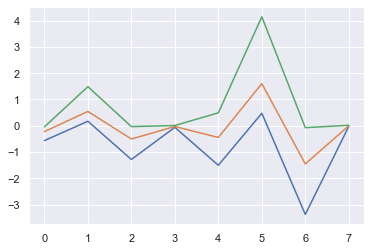

In [131]:
plt.plot(pltcb)

In [156]:
gmmrespdnewcum = pd.DataFrame(columns=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7'], index = gmmrespdnew.index)
gmmrespdnewcum.iloc[:,0] =  gmmrespdnew.iloc[:,0]
for i in range(1, 8):
    gmmrespdnewcum.iloc[:,i] = gmmrespdnew.iloc[:,i]-gmmrespdnewcum.iloc[:,:i-1].sum(axis=1)

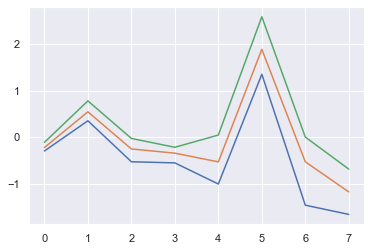

In [157]:
pltcb = pd.DataFrame(columns=['p25','Median','p75'], index = np.arange(0,8))
#pltcb['Min'] = pd.Series(gmmrespdnew.min().values)
pltcb['p25'] = pd.Series(gmmrespdnewcum.quantile(0.25).values)
pltcb['Median'] = pd.Series(gmmrespdnewcum.quantile(0.5).values)
pltcb['p75'] = pd.Series(gmmrespdnewcum.quantile(0.75).values)
plt.plot(pltcb)

In [149]:
i = 1
gmmrespdnewcum.iloc[:,:i].sum(axis=1)

1      0.113540
2     -0.501070
4     -0.567018
5     -0.070381
6     -0.082773
         ...   
108   -0.133571
110   -0.086850
112   -0.109794
114   -0.019500
115    0.966645
Length: 68, dtype: float64